<a href="https://colab.research.google.com/github/Srinivas1258/ML-DL/blob/master/ML/Mall_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
threshold_time=-0.1
threshold_time1=0.1

In [128]:
from google.colab import files
f=files.upload()

Saving Mall_customer.csv to Mall_customer (3).csv


In [159]:
df=pd.read_csv('Mall_customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [160]:
df.shape

(200, 5)

In [161]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [162]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [163]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Data visulalization**

In [164]:
plt.style.use('fivethirtyeight')


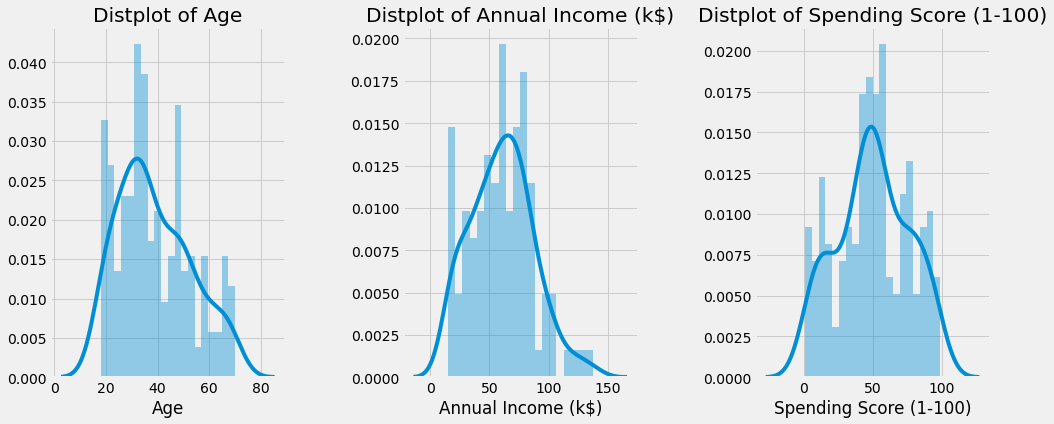

In [165]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

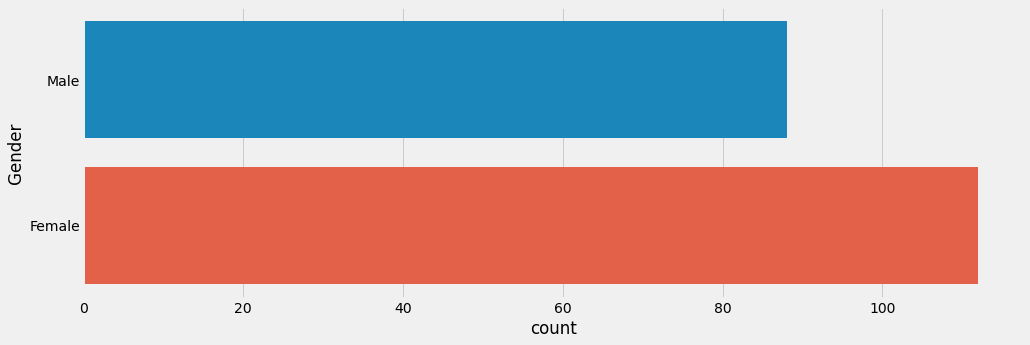

In [166]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

Ploting the Relation between Age , Annual Income and Spending Score¶


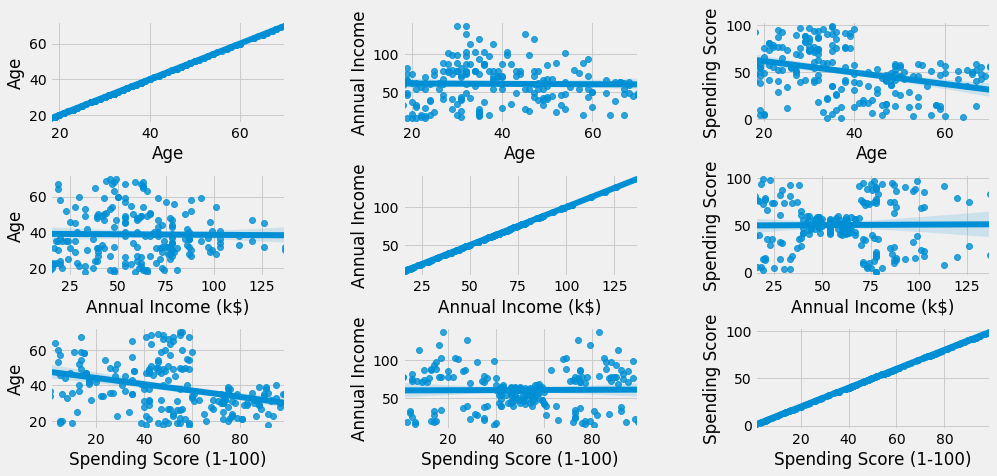

In [167]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

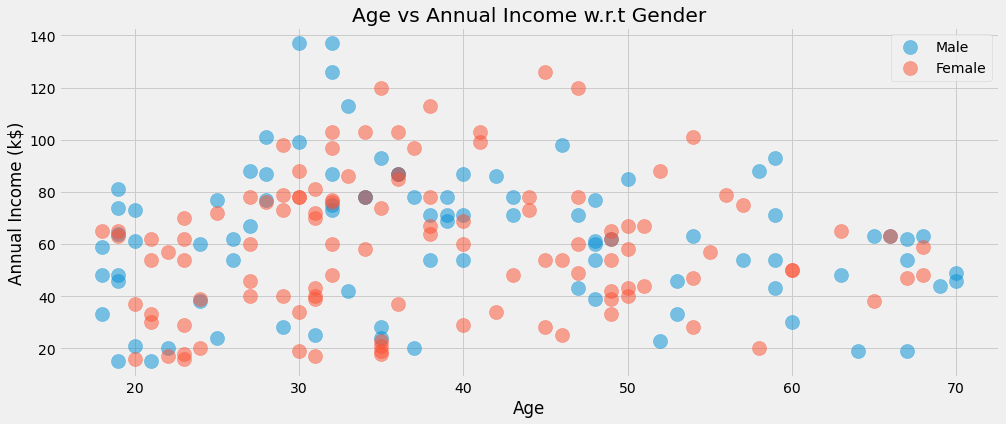

In [168]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

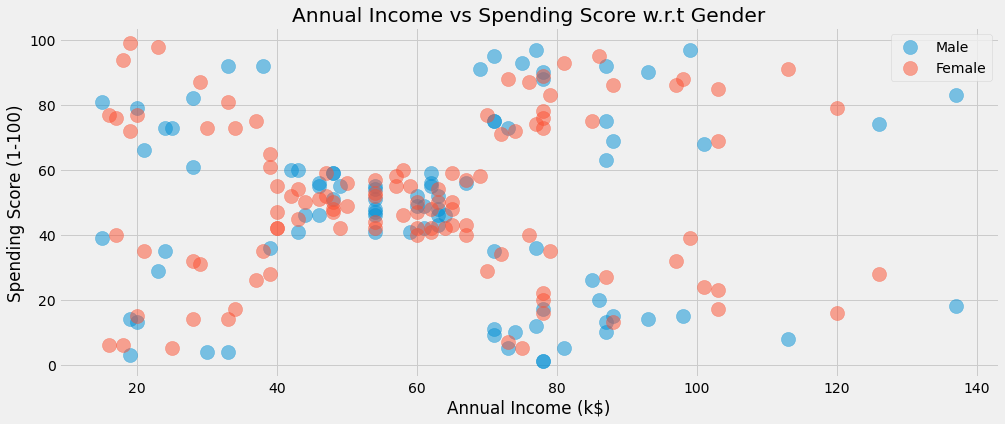

In [169]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

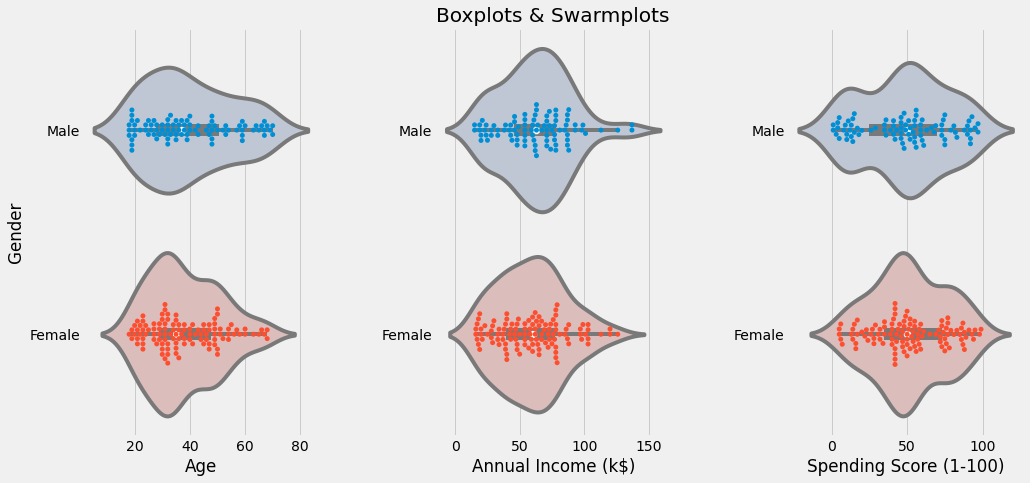

In [170]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

**Clustering using K- means**

1.Segmentation using Age and Spending Score

In [171]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

In [172]:
import numpy as np

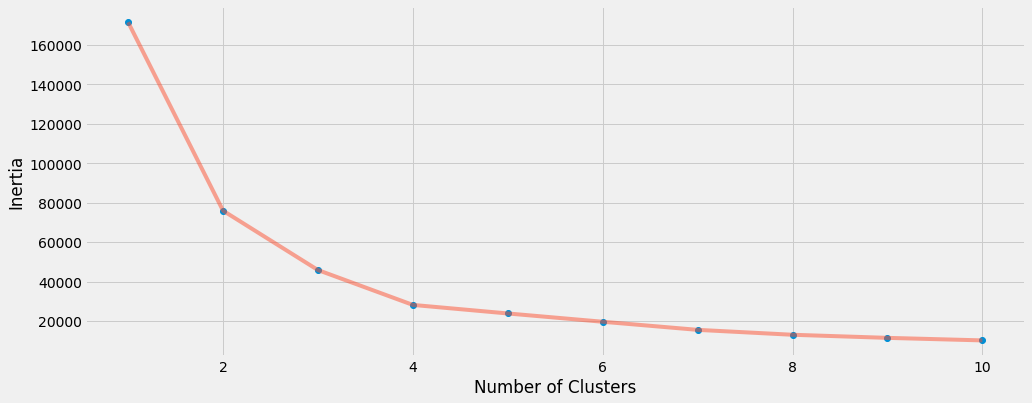

In [173]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Now the no.of clusters available in the dataset - 4 (using elbow method)

In [174]:
# print(type(X1))

In [175]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [176]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


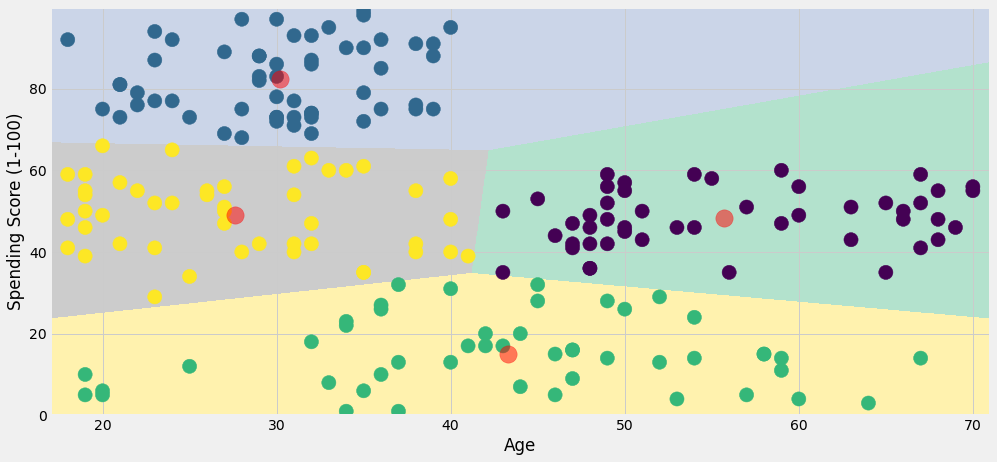

In [177]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()


2. Segmentation using Annual Income and Spending Score

In [278]:
'''Annual Income and spending Score
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)'''

"Annual Income and spending Score\nX2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values\ninertia = []\nfor n in range(1 , 11):\n    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, \n                        tol=0.0001,  random_state= 111  , algorithm='elkan') )\n    algorithm.fit(X2)\n    inertia.append(algorithm.inertia_)"

In [279]:
'''plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()'''

"plt.figure(1 , figsize = (15 ,6))\nplt.plot(np.arange(1 , 11) , inertia , 'o')\nplt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)\nplt.xlabel('Number of Clusters') , plt.ylabel('Inertia')\nplt.show()"

Now the no.of clusters = 5

In [180]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [181]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

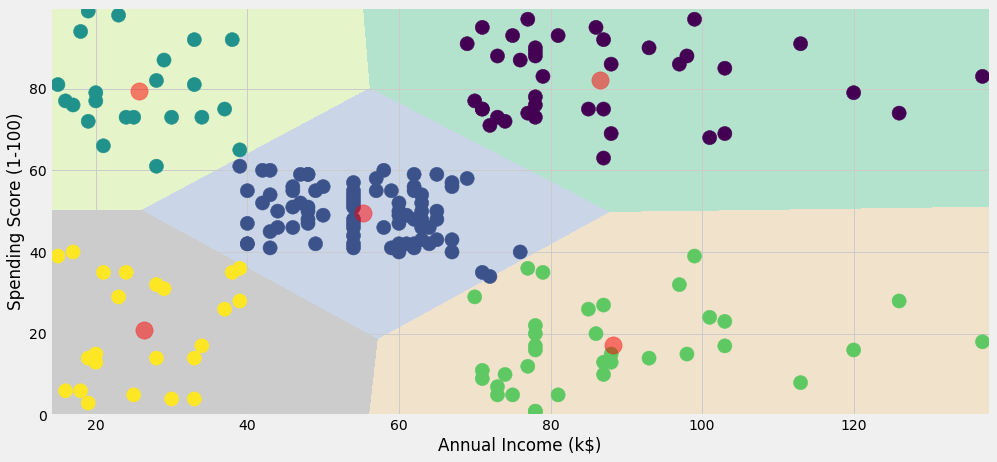

In [182]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()


In [276]:
'''X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)'''

"X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values\ninertia = []\nfor n in range(1 , 11):\n    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, \n                        tol=0.0001,  random_state= 111  , algorithm='elkan') )\n    algorithm.fit(X3)\n    inertia.append(algorithm.inertia_)"

In [277]:
'''plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()'''

"plt.figure(1 , figsize = (15 ,6))\nplt.plot(np.arange(1 , 11) , inertia , 'o')\nplt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)\nplt.xlabel('Number of Clusters') , plt.ylabel('Inertia')\nplt.show()"

**Finally we got no.of clusters = 5**

In [185]:
'''algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_'''

In [223]:
X4 = df.drop(['CustomerID', 'Gender'], axis=1) # bcoz it does not contain any valid info

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.82 µs


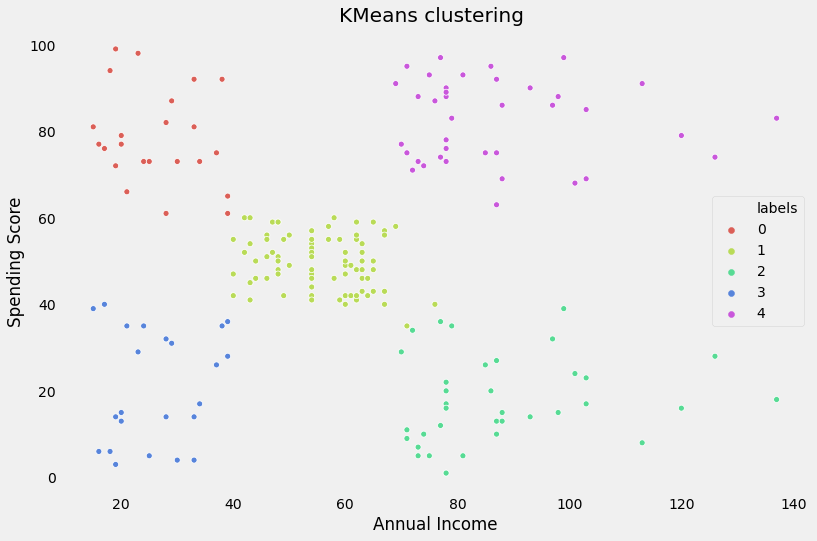

time is  0.2281722068786621


In [246]:
%time
import time
start_time = time.time()
Kmeans=KMeans(n_clusters=5,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan').fit(X4)
          
X4['labels'] = Kmeans.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], hue=X4['labels'], 
                palette=sns.color_palette('hls', np.unique(Kmeans.labels_).shape[0]))
plt.style.use('fivethirtyeight')
plt.title('KMeans clustering ')

# plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

Kmeans_time=(time.time()-start_time+threshold_time)
print('time is ',Kmeans_time)


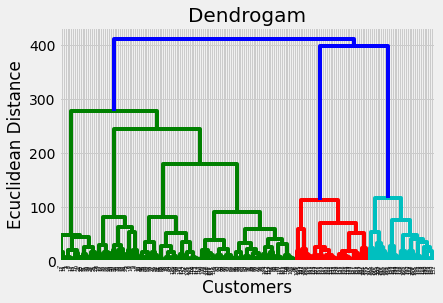

In [247]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X3, method = 'ward'))
# plt.figure(1,figsize=(14,10))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


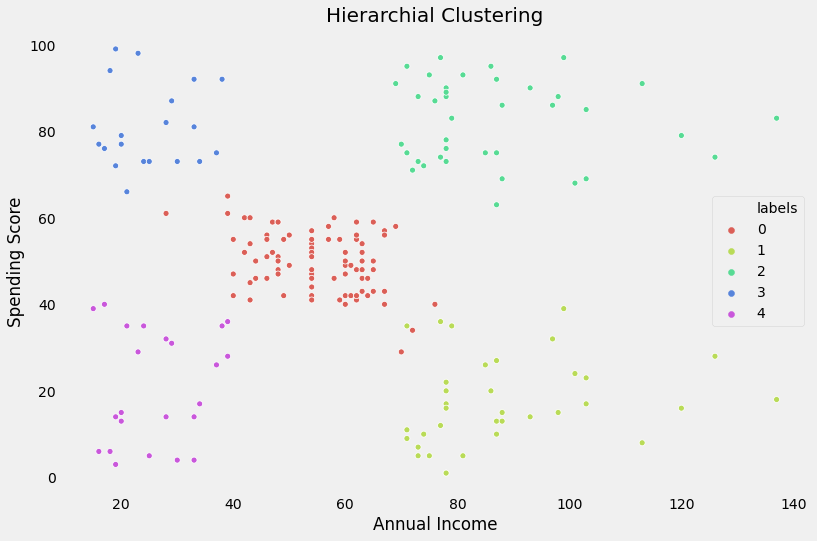

time is  0.36757097244262693


In [248]:
%time
import time
start_time=time.time()
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit(X4)
X4['labels'] = hc.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], hue=X4['labels'], 
                palette=sns.color_palette('hls', np.unique(hc.labels_).shape[0]))
plt.style.use('fivethirtyeight')
# plt.title('KMeans clustering ')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

Agc_time=(time.time()-start_time+threshold_time1)
print('time is ',Agc_time)


In [249]:
'''from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X3)

plt.figure(1,figsize=(15,8))
plt.scatter(X3[y_hc == 0, 0], X3[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(X3[y_hc == 1, 0], X3[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X3[y_hc == 2, 0], X3[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X3[y_hc == 3, 0], X3[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X3[y_hc == 4, 0], X3[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(algorithm.cluster_centers_[:,0], algorithm.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()'''

"from sklearn.cluster import AgglomerativeClustering\n\nhc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')\ny_hc = hc.fit_predict(X3)\n\nplt.figure(1,figsize=(15,8))\nplt.scatter(X3[y_hc == 0, 0], X3[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')\nplt.scatter(X3[y_hc == 1, 0], X3[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')\nplt.scatter(X3[y_hc == 2, 0], X3[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')\nplt.scatter(X3[y_hc == 3, 0], X3[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')\nplt.scatter(X3[y_hc == 4, 0], X3[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')\nplt.scatter(algorithm.cluster_centers_[:,0], algorithm.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')\n\nplt.style.use('fivethirtyeight')\nplt.title('Hierarchial Clustering', fontsize = 20)\nplt.xlabel('Annual Income')\nplt.ylabel('Spending Score')\nplt.legend()\nplt.grid()\nplt.show()"

In [250]:

X4 = df.drop(['CustomerID', 'Gender'], axis=1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


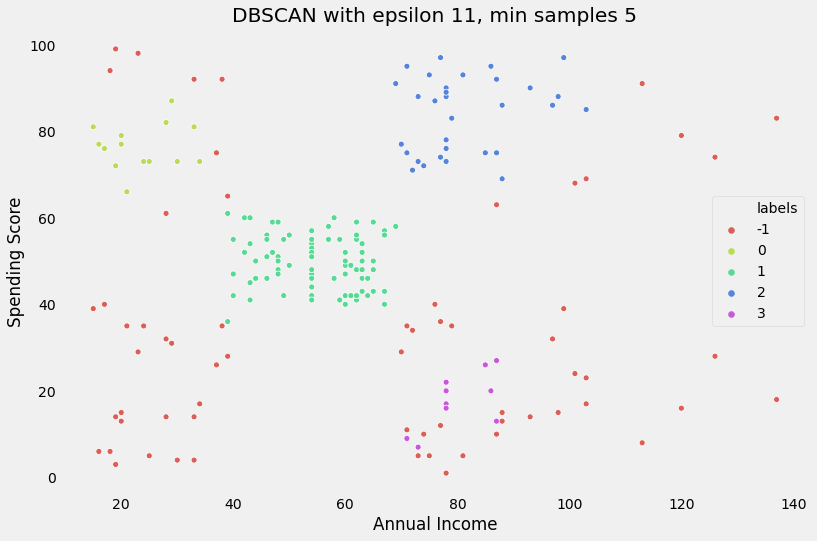

time is  0.41449627876281736


In [251]:
%time
start_time=time.time()
from sklearn.cluster import DBSCAN 


db = DBSCAN(eps=11, min_samples=6).fit(X4)

X4['labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], hue=X4['labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.style.use('fivethirtyeight')
plt.title('DBSCAN with epsilon 11, min samples 5')

# plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

Dbscan_time=(time.time()-start_time+threshold_time1)
print('time is ',Dbscan_time)


**The GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models.**

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


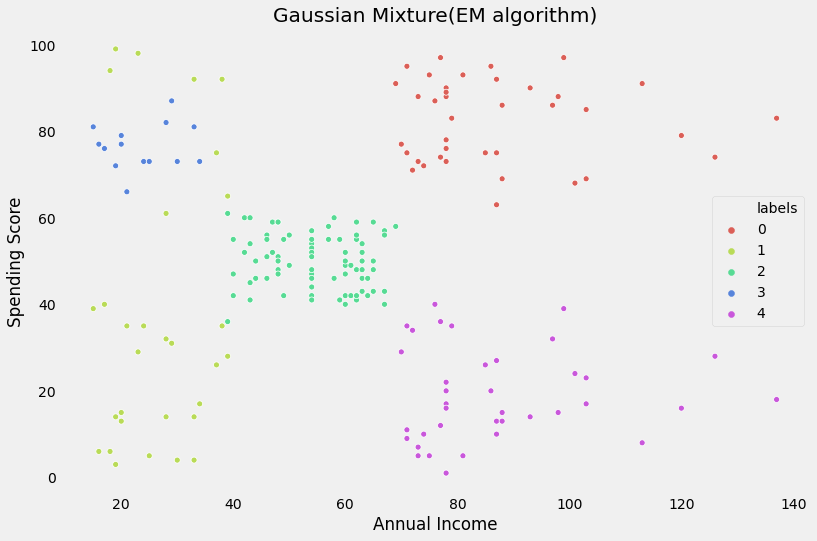

time is  0.47067747116088865


In [252]:
%time
start_time=time.time()
from sklearn.mixture import GaussianMixture

gm= GaussianMixture(n_components=5).fit(X4)

X4['labels'] = gm.predict(X4)
plt.figure(figsize=(12, 8))
sns.scatterplot(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], hue=X4['labels'], 
                palette=sns.color_palette('hls', np.unique(X4['labels']).shape[0]))
plt.style.use('fivethirtyeight')
plt.title('Gaussian Mixture(EM algorithm)')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

EM_time=(time.time()-start_time+threshold_time1)
print('time is ',(EM_time))



**Mean Shift Algorithm**

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


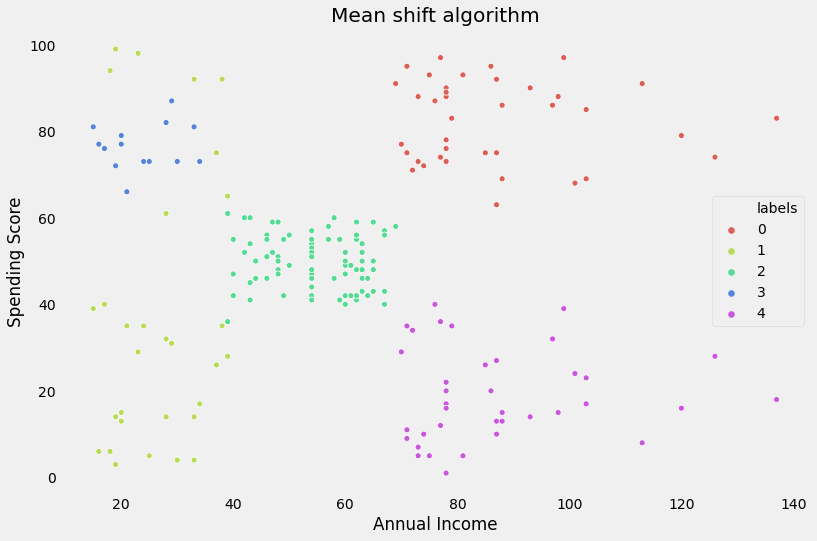

time is  0.9872798919677734


In [253]:
%time
start_time= time.time()
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X4, quantile=0.1)
ms = MeanShift(bandwidth).fit(X4)

X4['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], hue=X4['labels'], 
                palette=sns.color_palette('hls', np.unique(X4['labels']).shape[0]))
plt.style.use('fivethirtyeight')
plt.title('Mean shift algorithm')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

Mean_shift_time =time.time()-start_time
print('time is ',Mean_shift_time)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


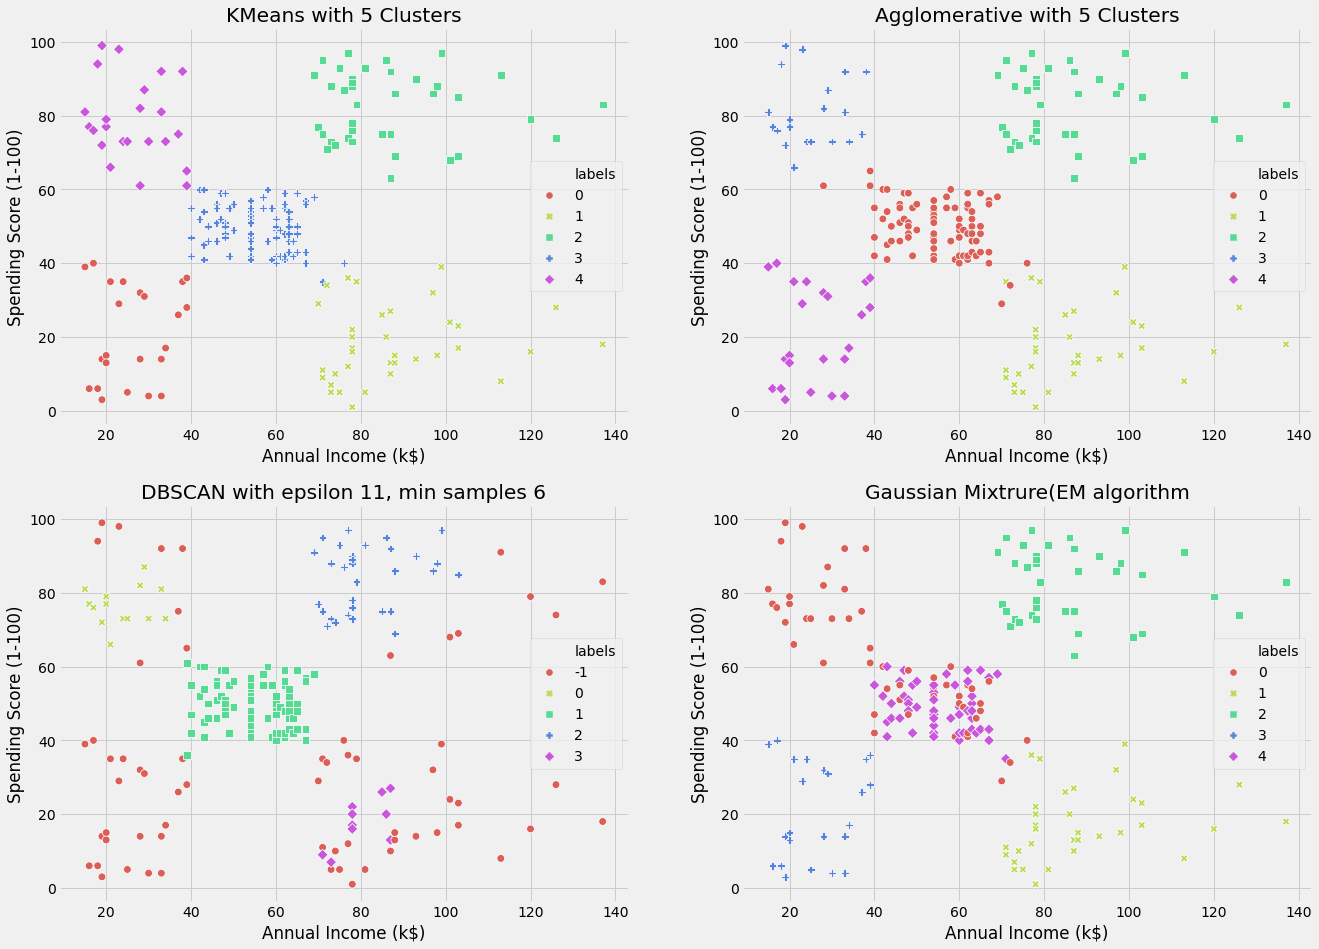

<Figure size 864x576 with 0 Axes>

"X4 = df.drop(['CustomerID', 'Gender'], axis=1)\nax = fig.add_subplot(225)\nbandwidth = estimate_bandwidth(X4, quantile=0.1)\nms = MeanShift(bandwidth).fit(X4)\n\nX4['Labels'] = ms.labels_\n# plt.figure(figsize=(12, 8))\nsns.scatterplot(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], hue=X4['labels'],style=X4['labels'], s=60,  \n                palette=sns.color_palette('hls', np.unique(X4['labels']).shape[0]),ax=ax)\n\nax.set_title('Mean shift algorithm')\n\nplt.tight_layout()\nplt.show()\n"

In [254]:
%time
fig = plt.figure(figsize=(20,15))

### KMeans 
X4 = df.drop(['CustomerID', 'Gender'], axis=1)
ax = fig.add_subplot(221)

Kmeans=KMeans(n_clusters=5,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan').fit(X4)
          
X4['labels'] = Kmeans.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], hue=X4['labels'],style=X4['labels'], s=60, 
                palette=sns.color_palette('hls', np.unique(Kmeans.labels_).shape[0]),ax=ax)
ax.set_title('KMeans with 5 Clusters')

##### Agglomerative Clustering #####
X4 = df.drop(['CustomerID', 'Gender'], axis=1)
ax = fig.add_subplot(222)
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit(X4)
X4['labels'] = hc.labels_
# plt.figure(figsize=(12, 8))
sns.scatterplot(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], hue=X4['labels'],style=X4['labels'], s=60,
                palette=sns.color_palette('hls', np.unique(hc.labels_).shape[0]),ax=ax)

ax.set_title('Agglomerative with 5 Clusters')
# plt.show()
### DBSCAN
X4 = df.drop(['CustomerID', 'Gender'], axis=1)
ax = fig.add_subplot(223)
db = DBSCAN(eps=11, min_samples=6).fit(X4)

X4['labels'] = db.labels_
# plt.figure(figsize=(12, 8))
sns.scatterplot(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], hue=X4['labels'],style=X4['labels'], s=60, 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]),ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')

### Gaussian Mixture (EM algorithm)
X4 = df.drop(['CustomerID', 'Gender'], axis=1)
ax = fig.add_subplot(224)
gm= GaussianMixture(n_components=5).fit(X4)

X4['labels'] = gm.predict(X4)
# plt.figure(figsize=(12, 8))
sns.scatterplot(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], hue=X4['labels'],style=X4['labels'], s=60, 
                palette=sns.color_palette('hls', np.unique(X4['labels']).shape[0]),ax=ax)

ax.set_title('Gaussian Mixtrure(EM algorithm')
plt.tight_layout()
plt.show()
### MEAN SHIFT 
'''X4 = df.drop(['CustomerID', 'Gender'], axis=1)
ax = fig.add_subplot(225)
bandwidth = estimate_bandwidth(X4, quantile=0.1)
ms = MeanShift(bandwidth).fit(X4)

X4['Labels'] = ms.labels_
# plt.figure(figsize=(12, 8))
sns.scatterplot(X4['Annual Income (k$)'], X4['Spending Score (1-100)'], hue=X4['labels'],style=X4['labels'], s=60,  
                palette=sns.color_palette('hls', np.unique(X4['labels']).shape[0]),ax=ax)

ax.set_title('Mean shift algorithm')

plt.tight_layout()
plt.show()
'''

Now compare the time complexities of different algorithms

In [255]:
algorithms=['Kmeans','AGC','DBSCAN','EM','Meanshift']
time1=[Kmeans_time,Agc_time,Dbscan_time,EM_time,Mean_shift_time]

In [256]:
data=pd.DataFrame({'Algorithms':algorithms,'Time':time1})
data.head()

,Algorithms,Time
0,Kmeans,0.228172
1,AGC,0.367571
2,DBSCAN,0.414496
3,EM,0.470677
4,Meanshift,0.987280


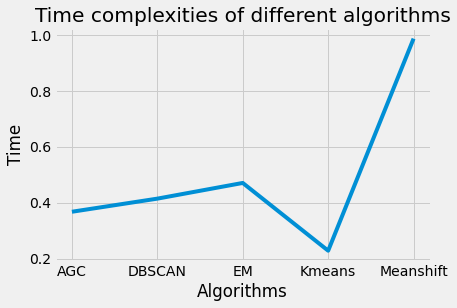

In [272]:
ax=sns.lineplot(x='Algorithms',y='Time',palette='hot',dashes=False,markers= ["o","<"],data=data)
plt.figure(1,figsize=(12,8))
plt.title('Time complexities of different algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Time')
# plt.legend()
plt.show()
figure=ax.get_figure()
figure.savefig('Time_vs_Algorithms.png')

In [275]:
f=files.download('Time_vs_Algorithms.png')  # downloading the image

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>